<a href="https://colab.research.google.com/github/Yusuf-Mounier/Hand-Written-Digit-Recognition-/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# call Dataset
mnist = tf.keras.datasets.mnist

# Trainig & testing vairables
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# creat Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training Process
model.fit(x_train, y_train, epochs=3)

# Save model
model.save('handwritten.keras')

# Print Accuracy
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2661 - accuracy: 0.9225
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1098 - accuracy: 0.9657
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9697
0.09764330089092255
0.9696999788284302


1/1 [==============================] - 0s 143ms/step
This digit is probably a 0


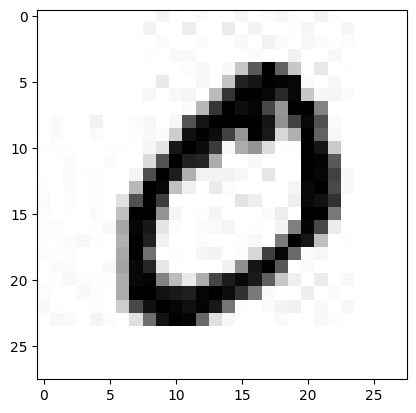

1/1 [==============================] - 0s 30ms/step
This digit is probably a 1


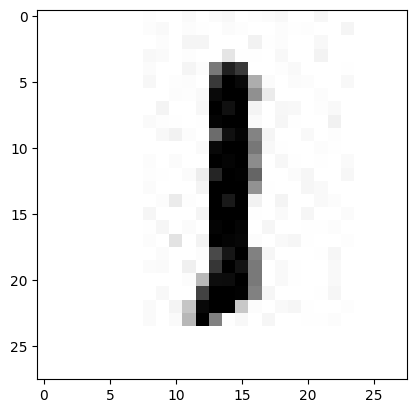

1/1 [==============================] - 0s 31ms/step
This digit is probably a 2


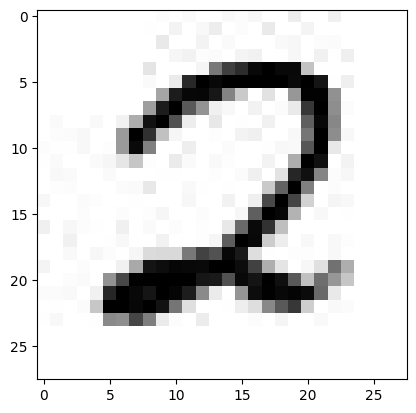

1/1 [==============================] - 0s 34ms/step
This digit is probably a 3


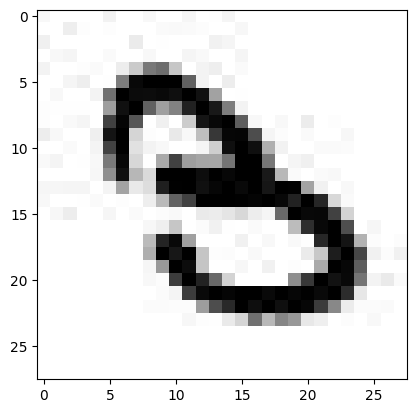

1/1 [==============================] - 0s 29ms/step
This digit is probably a 4


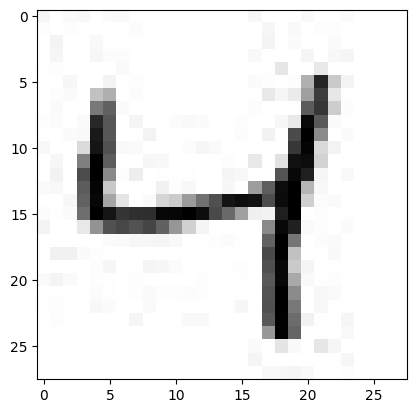

1/1 [==============================] - 0s 31ms/step
This digit is probably a 5


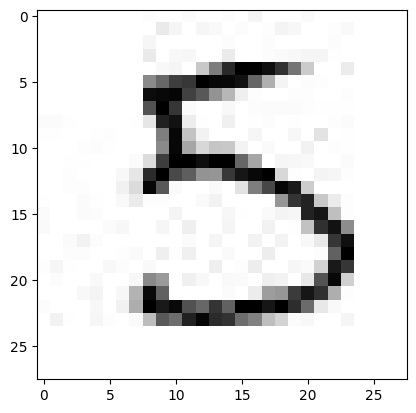

1/1 [==============================] - 0s 41ms/step
This digit is probably a 6


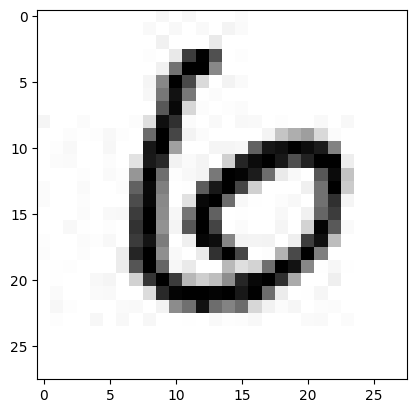

1/1 [==============================] - 0s 22ms/step
This digit is probably a 7


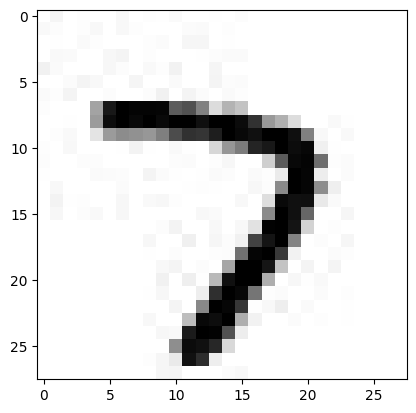

1/1 [==============================] - 0s 21ms/step
This digit is probably a 8


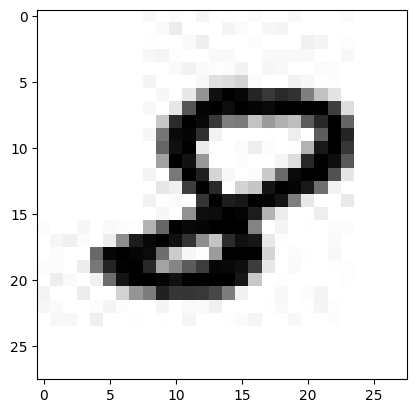

1/1 [==============================] - 0s 20ms/step
This digit is probably a 9


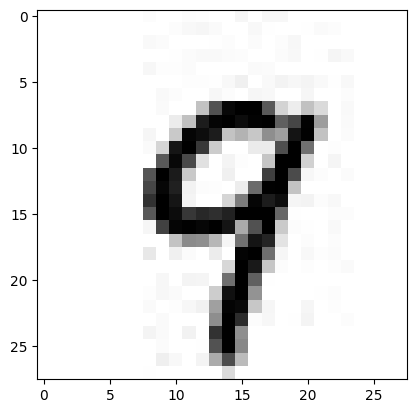

In [ ]:
for index in range(0,10):
  img = cv2.imread(f'{index}.jpeg', cv2.IMREAD_GRAYSCALE)
  img_reshape = img.reshape(1, 28,28)
  prediction = model.predict(img_reshape)
  print(f"This digit is probably a {np.argmax(prediction)}")
  plt.imshow(img, cmap=plt.cm.binary)
  plt.show()